# Fase 1: Análise Exploratória de Dados (EDA)

Neste notebook, realizamos a primeira análise nos dados históricos de 5 anos para o par BTC/USDT. O objetivo é entender as características fundamentais do ativo, como sua tendência de preço, volatilidade e a distribuição de seus retornos diários.


In [7]:
# CÉLULA 1: Importar as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhor visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


In [8]:
# CÉLULA 2: Carregar os dados do ficheiro .feather

# Caminho para o ficheiro de dados
data_path = '../user_data/data/binance/BTC_USDT-1d.feather'

# Carregar os dados
try:
    df = pd.read_feather(data_path)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    
    print("DADOS CARREGADOS COM SUCESSO!")
    print(f"Período dos dados: de {df.index.min()} a {df.index.max()}")
    display(df.head())

except FileNotFoundError:
    print(f"Erro: Ficheiro não encontrado em '{data_path}'")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")


DADOS CARREGADOS COM SUCESSO!
Período dos dados: de 2020-09-20 00:00:00+00:00 a 2025-09-18 00:00:00+00:00


,open,high,low,close,volume
date,,,,,
2020-09-20 00:00:00+00:00,11080.64,11080.64,10723.00,10920.28,39157.922565
2020-09-21 00:00:00+00:00,10920.28,10988.86,10296.35,10417.22,70683.431179
2020-09-22 00:00:00+00:00,10417.22,10572.71,10353.00,10529.61,43991.235476
2020-09-23 00:00:00+00:00,10529.61,10537.15,10136.82,10241.46,51876.568079
2020-09-24 00:00:00+00:00,10241.46,10795.24,10190.93,10736.32,57676.619427


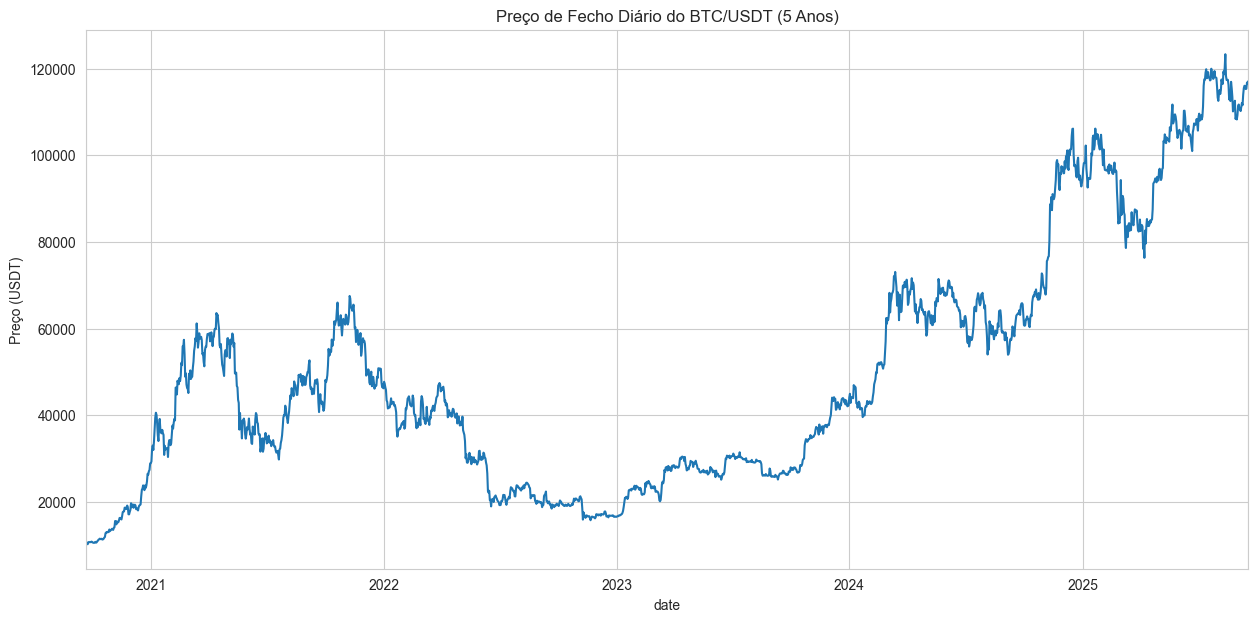

In [9]:
# CÉLULA 3: Visualizar o preço de fecho

df['close'].plot(title='Preço de Fecho Diário do BTC/USDT (5 Anos)')
plt.ylabel('Preço (USDT)')
plt.show()


### Análise 1: Gráfico de Preço (5 Anos)

**Observações:**
*   **Ciclos de Mercado:** O gráfico evidencia claramente a natureza cíclica do Bitcoin. Identificamos o grande "bull market" de 2020-2021, com seus dois picos distintos, seguido pelo "bear market" de 2022.
*   **Tendência de Longo Prazo:** Apesar da alta volatilidade, a tendência geral ao longo dos 5 anos é de alta.
*   **Implicação:** O modelo precisa ser robusto o suficiente para se adaptar às diferentes "personalidades" do mercado (alta, baixa, acumulação).


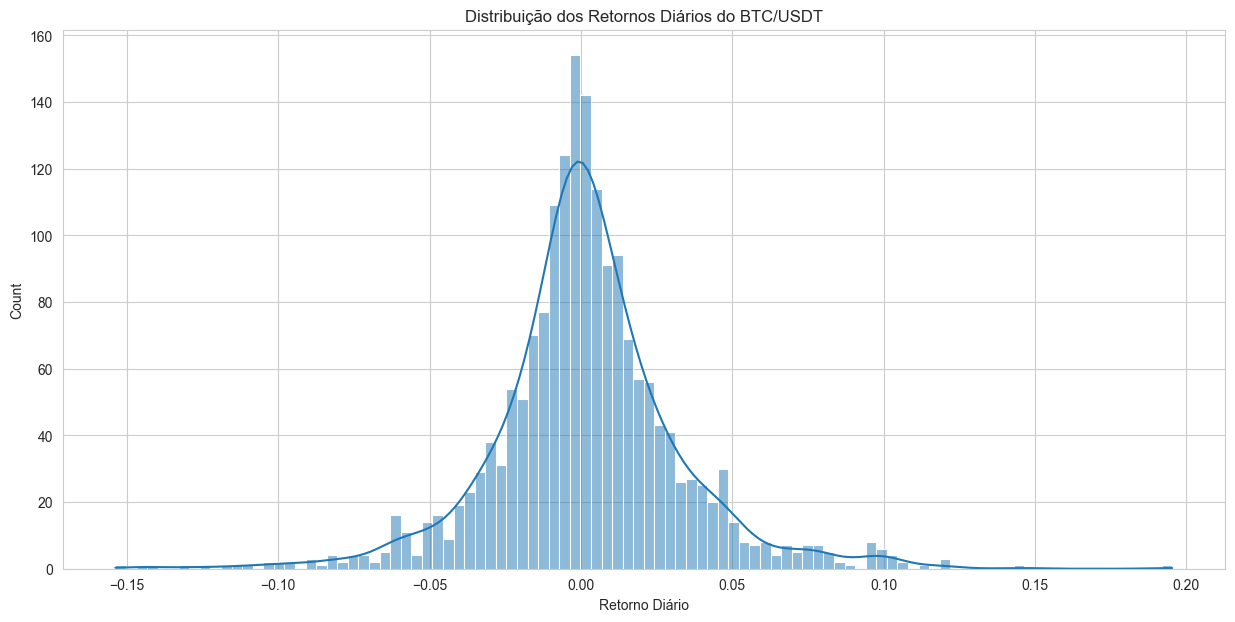

Estatísticas dos Retornos Diários:


count    1824.000000
mean        0.001786
std         0.031163
min        -0.153798
25%        -0.012343
50%         0.000285
75%         0.015267
max         0.195361
Name: daily_return, dtype: float64

In [11]:
# CÉLULA 4: Análise de Retornos Diários

# Calcular os retornos diários
df['daily_return'] = df['close'].pct_change()

# Plotar um histograma para ver a distribuição dos retornos
sns.histplot(df['daily_return'].dropna(), bins=100, kde=True)
plt.title('Distribuição dos Retornos Diários do BTC/USDT')
plt.xlabel('Retorno Diário')
plt.show()

# Exibir estatísticas descritivas dos retornos
print("Estatísticas dos Retornos Diários:")
display(df['daily_return'].describe())


### Análise 2: Retornos Diários

**Observações:**
*   **Leptocurtose (Pico Alto):** A distribuição é mais "pontuda" que uma distribuição normal. Isso indica que a maioria dos dias apresenta variações de preço muito pequenas, próximas de zero.
*   **Caudas Gordas (Fat Tails):** As extremidades do gráfico mostram que eventos de retornos extremos (tanto positivos quanto negativos, como +/- 10%) são mais frequentes do que a teoria normal preveria.
*   **Alta Volatilidade:** A tabela de estatísticas confirma um desvio padrão (`std`) de ~3.7%, o que é extremamente alto e indica um ativo de alto risco.
*   **Implicação:** A estratégia precisa de uma gestão de risco rigorosa (stop-loss) e o modelo deve ser treinado para não ignorar, mas sim aprender com os eventos extremos das "caudas gordas".
